## Observations and Insights 

In [73]:
#Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.
# 1. Capomulin and were the two most used drugs during the trials.

# 2. The larger weight of the mice coralated into a higher tumour likleyhood.

# 3.More male mice were used in the drug trials than females.



# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [74]:
# Checking the number of mice.
combined_data['Mouse ID'].count()

1893

In [75]:
# Getting the duplicate mice by ID for Mouse ID and Timepoint. 
x = pd.DataFrame(combined_data, columns=['Mouse ID', 'Timepoint'])
dup_data = x[x.duplicated()]
dup_mouse = dup_data['Mouse ID']
print(dup_mouse)


909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object


In [76]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dups = combined_data.loc[combined_data['Mouse ID'] == 'g989']
all_dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [77]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
index = combined_data[combined_data['Mouse ID'] == 'g989'].index
combined_data.drop(index, inplace=True)
print(combined_data)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [78]:
# Checking the number of mice in the clean DataFrame.
combined_data['Mouse ID'].count()

combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [79]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
# Tumor volume for each regimen
sum_stats = pd.DataFrame(combined_data.groupby('Drug Regimen').count())
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
sum_stats['Mean'] = pd.DataFrame(combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean())
sum_stats['Median'] = pd.DataFrame(combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median())
sum_stats['Standard Deviation'] = pd.DataFrame(combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std())
sum_stats['Variance'] = pd.DataFrame(combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var())
sum_stats['SEM'] = pd.DataFrame(combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem())

sum_stats = sum_stats[['Mouse ID', 'Mean', 'Median', 'Standard Deviation', 'Variance', 'SEM']]

sum_stats = sum_stats.rename(columns = {'Mouse ID' : 'Trials'})
sum_stats.head()

,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


## Bar and Pie Charts

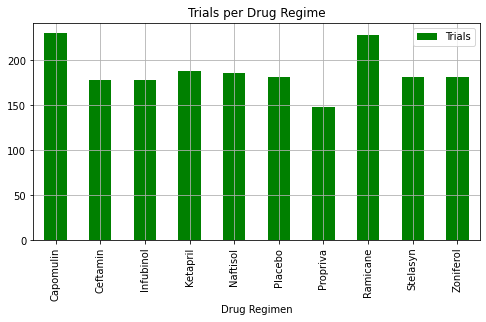

In [80]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
bar_d = sum_stats[['Trials']]
bar_d.plot(kind = 'bar', figsize=(8,4), color = 'g', title='Trials per Drug Regime', legend = True)
plt.tight_layout
plt.grid()
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()



No handles with labels found to put in legend.


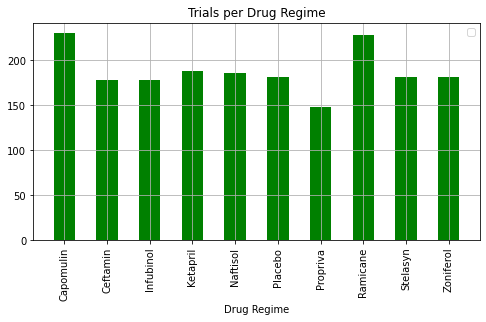

In [91]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# X axis and tick locations
x_axis = np.arange(len(bar_d))
tick_locations = [value for value in x_axis]

# X labels and set figure size to adjust for space
plt.figure(figsize=(8,4))
plt.bar(x_axis, bar_d['Trials'], color = 'g', width = .5)
plt.xticks(tick_locations, bar_d.index.values, rotation='vertical')
# Title and labels
plt.title('Trials per Drug Regime')
plt.xlabel('Drug Regime')

# Graph
plt.grid()
plt.legend()
plt.show()

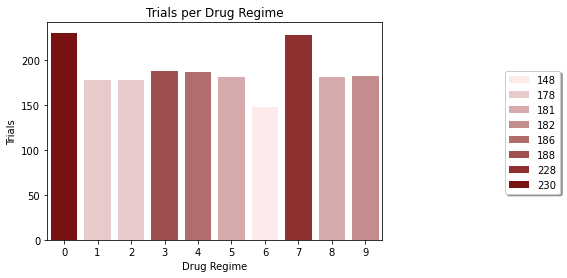

In [82]:
# Aded a seaborn Chart to try it out

ax = sns.barplot( x = x_axis, y = bar_d['Trials'], data = sum_stats, 
                 hue=bar_d['Trials'], color = 'darkred', ci = None, dodge=False)
ax.set_title('Trials per Drug Regime')
ax.set_xlabel('Drug Regime')
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)


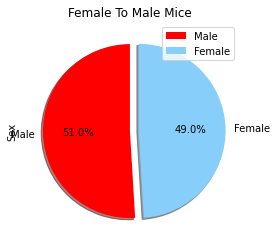

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Filter the DataFrame down only to those columns to chart
sex = combined_data['Sex'].value_counts()
explode = (0, 0.10)
colors = ['red', 'lightskyblue']

sex.plot(kind='pie', explode=explode, labels=sex.index.values, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90, legend=True)

# Title for the chart
plt.title('Female To Male Mice')
plt.show()

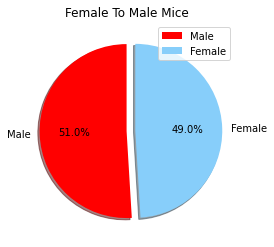

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = combined_data['Sex'].value_counts()

labels = ['Male', 'Female']
colors = ["red", "lightskyblue"]
explode = (0, 0.10)
plt.pie(sex, labels=sex.index.values, explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)



# Title for the chart
plt.title('Female To Male Mice')
plt.legend()
plt.show()


## Quartiles, Outliers and Boxplots

In [85]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
filt_df = combined_data.loc[(combined_data['Drug Regimen'] == 'Capomulin') 
                            | (combined_data['Drug Regimen'] == 'Ramicane') 
                            | (combined_data['Drug Regimen'] == 'Infubinol') 
                            | (combined_data['Drug Regimen'] == 'Ceftamin'), :]
# Start by getting the last (greatest) timepoint for each mouse
filt_df = filt_df.sort_values('Timepoint', ascending = False)
filt_df = filt_df.drop_duplicates(subset='Mouse ID', keep='first')


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [86]:
# Put treatments into a list for for loop (and later for plot labels)
# Finding all traeatments for lsit 
combined_data['Drug Regimen'].value_counts()
treatments = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 
              'Placebo', 'Stelasyn', 'Infubinol', 'Ceftamin', 'Propriva']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quarts = filt_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quarts[0.25]
upperq = quarts[0.75]
iqr = upperq-lowerq
    
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f'Values below {lower_bound} could be outliers.')
print(f'Values above {upper_bound} could be outliers.')

outliers = filt_df.loc[(filt_df['Tumor Volume (mm3)'] < lower_bound) | (filt_df['Tumor Volume (mm3)'] > upper_bound)]
outliers

Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


No handles with labels found to put in legend.


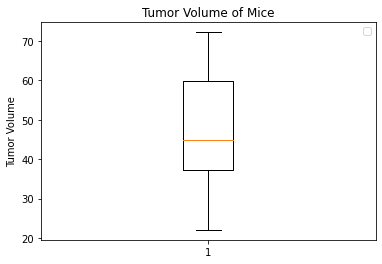

In [87]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Tumor_Volume = filt_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_Volume)
plt.legend()
plt.show()

## Line and Scatter Plots

No handles with labels found to put in legend.


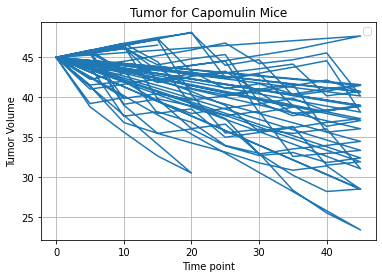

In [88]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = combined_data.loc[(combined_data['Drug Regimen'] == 'Capomulin')]

# Variables 
timepoint = capomulin['Timepoint']
tumor_volume = capomulin['Tumor Volume (mm3)']

# Tumor volume for various mice
tumor_volume_line, = plt.plot(timepoint, tumor_volume)

# Chart and labels
plt.xlabel('Time point')
plt.ylabel('Tumor Volume')
plt.title('Tumor for Capomulin Mice')
plt.grid()
plt.legend()
plt.show()

No handles with labels found to put in legend.


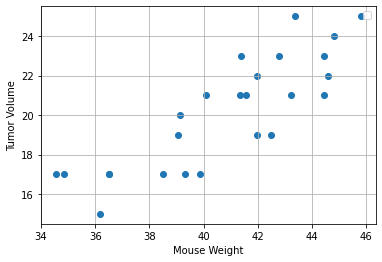

In [89]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Pull values for x and y values
a_tumor_volume = capomulin.groupby(capomulin['Mouse ID'])['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin.groupby(capomulin['Mouse ID'])['Weight (g)'].mean()


# Create Scatter Plot with values calculated above
plt.scatter(a_tumor_volume,mouse_weight)
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.grid()
plt.legend()
plt.show()


## Correlation and Regression

No handles with labels found to put in legend.


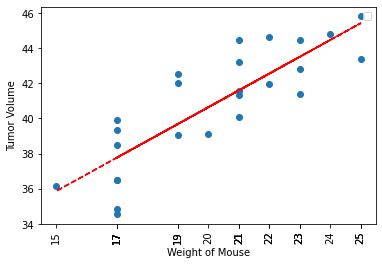

The correlation between weight and tumor value is 0.84


In [90]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Perform a linear regression 
slope, int, r, p, std_err = st.linregress(mouse_weight, a_tumor_volume)
      
# Equation of line to calculate predicted 
regress_values = slope * mouse_weight + int
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(int,2))

# Linear model on top of scatter plot 
plt.scatter(mouse_weight,a_tumor_volume)
plt.xlabel('Weight of Mouse')
plt.ylabel('Tumor Volume')
plt.plot(mouse_weight,regress_values,'r--')

plt.xticks(mouse_weight, rotation=90)
plt.legend()
plt.show()

# Correlation coefficient
print(f'The correlation between weight and tumor value is {round(st.pearsonr(mouse_weight,a_tumor_volume)[0],2)}')